<a href="https://colab.research.google.com/github/ArrogantNobody/Pytorch_study/blob/main/pytorch_foundation_optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference: https://zhuanlan.zhihu.com/p/115559863

In [1]:
import torch
import torch.utils.data  as Data
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.autograd import Variable
#神经网络需要输入的数据形式为Variable的变量，但是经过自己的实验最新的pytorch，
#对于输入的tensor就可以进行处理，可以不需要转化成Variable的环节

LR = 0.01
BATCH_SIZE = 20
EPOCH = 20

torch.Size([1000, 1])


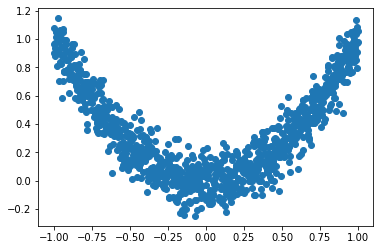

In [2]:
x = torch.unsqueeze(torch.linspace(-1,1,1000),dim=1)
print(x.shape)
y = x.pow(2)+0.1*torch.normal(torch.zeros(x.size()))


# plot dataset
plt.scatter(x,y)
plt.show()

In [3]:
torch_dataset = Data.TensorDataset(x,y)
loader = Data.DataLoader(dataset=torch_dataset,batch_size=BATCH_SIZE,shuffle=True)

In [4]:
class Net(nn.Module):
    def __init__(self,n_input,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden1 = nn.Linear(n_input,n_hidden)
        self.hidden2 = nn.Linear(n_hidden,n_hidden)
        self.predict = nn.Linear(n_hidden,n_output)
    def forward(self,input):
        out = self.hidden1(input)
        out = F.relu(out)
        out = self.hidden2(out)
        out = F.relu(out)
        out =self.predict(out)

        return out

In [5]:
net_SGD = Net(1,20,1)
net_Momentum = Net(1,20,1)
net_RMSprop = Net(1,20,1)
net_Adam = Net(1,20,1)

nets = [net_SGD,net_Momentum,net_RMSprop,net_Adam]

In [7]:
optimizer_SGD = torch.optim.SGD(net_SGD.parameters(),lr = LR)
optimizer_Momentum = torch.optim.SGD(net_Momentum.parameters(),lr = LR, momentum=0.8)
optimizer_RMSprop = torch.optim.RMSprop(net_RMSprop.parameters(),lr = LR, alpha = 0.9)
optimizer_Adam = torch.optim.Adam(net_Adam.parameters(),lr = LR, betas = (0.9,0.99))

optimzers = [optimizer_SGD,optimizer_Momentum,optimizer_RMSprop,optimizer_Adam]

loss_func = torch.nn.MSELoss()
losses_his = [[],[],[],[]]

In [8]:
for epoch in range(EPOCH):
    print(epoch)
    for step ,(batch_x,batch_y) in enumerate(loader):
        # b_x = Variable(batch_x)
        # b_y = Variable(batch_y)
        b_x = batch_x
        b_y = batch_y
        for net,optimizer,loss_his in zip(nets,optimzers,losses_his):
            net_output = net(b_x)
            loss = loss_func(net_output,b_y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_his.append(loss.item())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


1000
1000
1000
1000


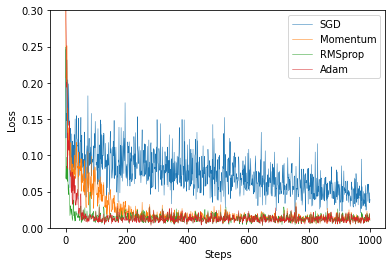

In [10]:
labels = ['SGD','Momentum','RMSprop','Adam']
for i,l_his in enumerate(losses_his):
    plt.plot(l_his,label=labels[i],lw=0.5)
    print(len(l_his))
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim(0,0.3)
plt.show()